In [5]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')


In [6]:
## Reading the data
df_marketdata = pd.read_csv("https://raw.githubusercontent.com/NaveenKaliannan/Machine-learning/main/tutorials/Assignments/Assignments1/MarketData.csv")

print(df_marketdata)

            Date         Open         High          Low        Close  \
0     2000-01-03  1469.250000  1478.000000  1438.359985  1455.219971   
1     2000-01-04  1455.219971  1455.219971  1397.430054  1399.420044   
2     2000-01-05  1399.420044  1413.270020  1377.680054  1402.109985   
3     2000-01-06  1402.109985  1411.900024  1392.099976  1403.449951   
4     2000-01-07  1403.449951  1441.469971  1400.729980  1441.469971   
...          ...          ...          ...          ...          ...   
5227  2020-10-12  3500.020020  3549.850098  3499.610107  3534.219971   
5228  2020-10-13  3534.010010  3534.010010  3500.860107  3511.929932   
5229  2020-10-14  3515.469971  3527.939941  3480.550049  3488.669922   
5230  2020-10-15  3453.719971  3489.080078  3440.889893  3483.340088   
5231  2020-10-16  3493.500000  3515.760010  3480.449951  3483.810059   

        Adj Close      Volume  
0     1455.219971   931800000  
1     1399.420044  1009000000  
2     1402.109985  1085500000  
3     1

In [7]:
df_fractional=pd.DataFrame(columns=['p1','p2','p3'])

opn=np.array(df_marketdata['Open'])
close=np.array(df_marketdata['Close'])
volume=np.array(df_marketdata['Volume'])

p1 = [ (opn[i]/opn[i-1])-1 for i in range(1,df_marketdata.shape[0],1)]
p2 = [ (opn[i]/close[i])-1 for i in range(1,df_marketdata.shape[0],1)]
p3 = [ (volume[i]/volume[i-1])-1 for i in range(1,df_marketdata.shape[0],1)]


for i in range(0,df_marketdata.shape[0]-1,1):
    df_fractional = df_fractional.append({'p1': p1[i] ,'p2': p2[i], 'p3': p3[i] }, ignore_index=True)  

print(df_fractional)
newdataset=np.array(df_fractional)


            p1        p2        p3
0    -0.009549  0.039874  0.082850
1    -0.038345 -0.001918  0.075818
2     0.001922 -0.000955  0.006264
3     0.000956 -0.026376  0.121670
4     0.027090 -0.011066 -0.130917
...        ...       ...       ...
5226  0.011663 -0.009677 -0.129495
5227  0.009711  0.006287  0.051380
5228 -0.005246  0.007682  0.065318
5229 -0.017565 -0.008503 -0.032023
5230  0.011518  0.002781  0.257758

[5231 rows x 3 columns]


In [8]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(newdataset)
y_kmean = model.predict(newdataset)

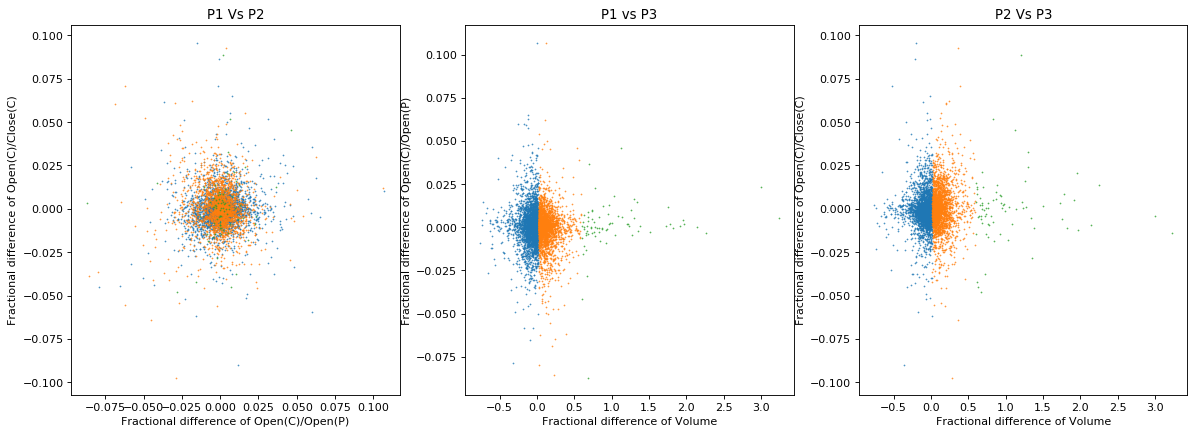

<Figure size 1440x480 with 0 Axes>

In [11]:
## Plotting the data
from numpy import unique
from numpy import where
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

y=y_kmean
rw=1
clm=3

fig, axs = plt.subplots(1, 3, figsize=(18,6), dpi=80)
figure(figsize=(18, 6), dpi=80 )
clusters = unique(y)

for cluster in clusters:
    index = where(y == cluster)
    
    axs[0].scatter(newdataset[index, 0],newdataset[index, 1],s=0.2)
    axs[0].set_xlabel('Fractional difference of Open(C)/Open(P)') 
    axs[0].set_ylabel('Fractional difference of Open(C)/Close(C)') 
    axs[0].set_title('P1 Vs P2')  
    
    axs[1].scatter(newdataset[index, 2],newdataset[index, 0],s=0.2)
    axs[1].set_xlabel('Fractional difference of Volume')    
    axs[1].set_ylabel('Fractional difference of Open(C)/Open(P)') 
    axs[1].set_title('P1 vs P3')

    axs[2].scatter(newdataset[index, 2],newdataset[index, 1],s=0.2)
    axs[2].set_xlabel('Fractional difference of Volume')    
    axs[2].set_ylabel('Fractional difference of Open(C)/Close(C)') 
    axs[2].set_title('P2 Vs P3') 
    
fig.savefig("Clusterparameters.png", format="png")
plt.show()
plt.close()

